<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-con-R/blob/main/michaelis-menten-y-hill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: La ecuación de Michaelis-Menten y la ecuación de Hill

Autor: Biología de sistemas UNAM

Fecha: febrero 2021

mostrar ecuación de Hill /michaelis menten en collab / papel y lápiz: Ecuaciones de Michaelis – Menten, ecuación de Hill, ultrasensibilidad, para diferentes coeficientes de Hill; Ejemplo de cómo se obtienen de manera simbólica los puntos de equilibrio de un sistema de EDos, usando Python

# Ecuación de Michaelis-Menten 

## 1. Describir el proceso 

Se lleva a cabo la transformación de un sustrato, $S$, a un producto, $P$. Esta reacción se realiza mediante la acción de una enzima, $E$, formando el complejo enzima sustrato, $ES$, como intermediario. El siguiente conjunto de reacciones describen este proceso

Reacción de formarción del complejo
$$
E + S \xrightarrow[]{k_1} ES \tag{1}
$$

Dado que la reacción anterior es reversible se tiene
$$
ES \xrightarrow[]{k_{-1}} E + S \tag{2}
$$

Para la formación del producto se considera la reacción no reversible

$$
ES \xrightarrow[]{k_2} P \tag{3}
$$

En el análisis posterior se realizan las siguientes suposiciones:

1. La cantidad total de enzima en el proceso permanece constante 

$$
E_{tot} = E + ES \tag{4}
$$

2. Se asume que el cambio en la concentración del complejo enzima-sustrato durante el proceso es despreciable. Es decir 

$$
\frac{dES}{dt} = 0 \tag{5}
$$

## 2. Red para describir el proceso 


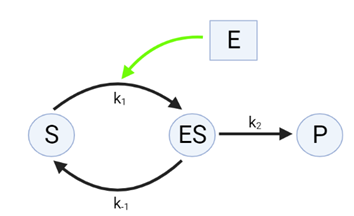

Figura 1. Red para describir el conjunto de reacciones (1)-(3). Se aprecia el efecto positivo de la enzima sobre la formación del complejo ES.

## 3. Establecer modelo 

Balance para el sustrato

$$
\frac{dS}{dt} = -k_1E\times S + k_{-1}ES \tag{7}
$$

$$
\
$$

Balance para el complejo enzima-sustrato

$$
\frac{dES}{dt} = k_1E\times S - k_{-1}ES - k_2ES \tag{8}
$$

$$
\
$$

Balance para el producto

$$
\frac{dP}{dt} = k_2ES \tag{9}
$$

Aplicando la ecuación de conservación (4) y la ecuación (5) se tiene 

$$
\frac{dES}{dt} = k_1(E_{tot} - ES)\times S - k_{-1}ES - k_2ES  = 0
$$

$$
\
$$

$$
(k_1S + k_{-1} + k_2)ES = k_1 E_{tot}
$$

$$
\
$$

$$
ES = \frac{k_1E_{tot}}{k_{-1} + k_2 + k_1S} \tag{10}
$$

$$
\
$$

Sustituyendo (10) en (9) se tiene 

$$
\frac{dP}{dt} = k_2\left( \frac{k_1E_{tot}}{k_{-1} + k_2 + k_1S} \right)
$$

Haciendo 

$$
K_M = \frac{k_{-1} + k_2}{k_1}, \hspace{1cm} v_{max} = k_2E_{tot}
$$

Se llega a 

$$
\frac{dP}{dt} = v_{max}\left( \frac{S}{K_M + S} \right)  \tag{11}
$$

La ecuación (11) se conoce como la ecuación de Michaelis-Menten y describe la velocidad de generación de producto como función de la concentración de sustrato. 





Tabla 1. Valor de parámetros de diferentes enzimas

| enzima |$K_M$ (M)| $k_2$ (1/s) |$k_2/K_M$ (1/(M s))$|
|:---:|:---:|:---:|:---:|
| pepsina | 3.0 E-4 | 0.5 | 1.7 E3 |
| T-ARN sintetasa | 9.0 E-4 | 7.6 | 8.4E3 |
| ribonucleasa | 7.9 E-3 | 7.6 E2 | 1.0 E5 |
| caboxilasa | 2.6 E-2 | 4.0 E5 | 1.5 E7 |
| fumarasa | 5.0 E-6 | 8.0 E12 | 1.6 E8 |

In [14]:
# velocidad de formación de producto 
velocity <- function(S, p) {
    with(as.list(p), {
        # velocidad de formación de P
        v = vmax*S/(Km + s)

        return(v)
    })
}

In [57]:
# simular con valores de la pepsina 
k2 <- 0.5 # 1/s
Etot <- 0.001 # M
p <- c(Km = 3.0*10^(-4), vmax = k2*Etot)
# valores de sustrato 
s <- seq(0,0.01,0.0001)
vel <- velocity(s, p)

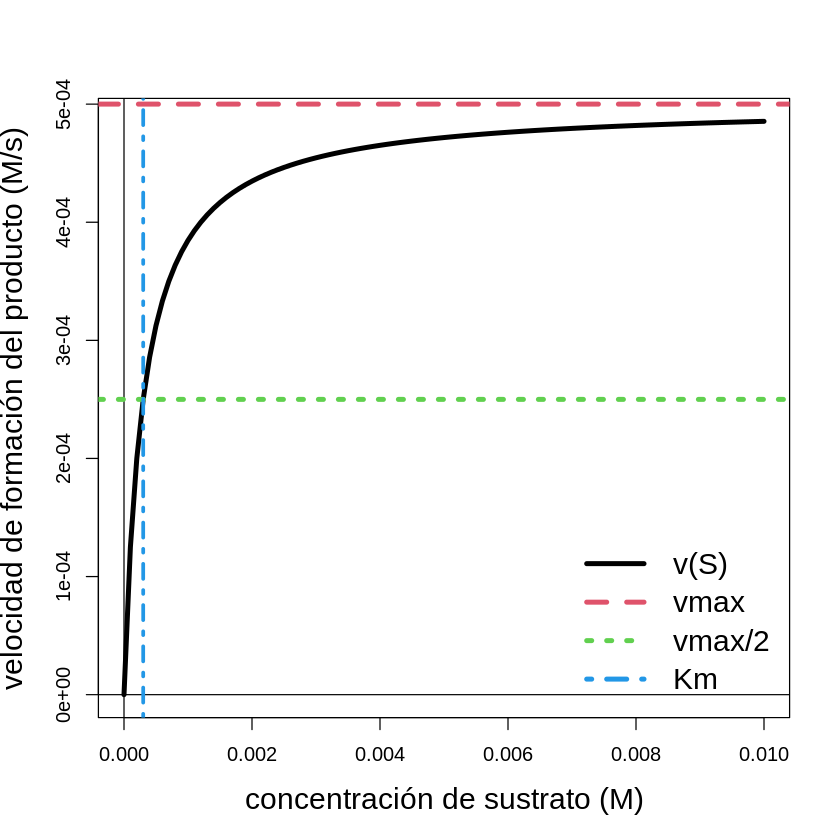

In [58]:
# mostra resultados 
plot(s, vel, type = "l", xlab = "concentración de sustrato (M)", ylab = "velocidad de formación del producto (M/s)",
     cex.lab = 1.5, lwd = 4)
abline(h = 0, v = 0)
abline(h = p["vmax"], lwd = 4, lty = 2, col = 2)
abline(h = p["vmax"]/2, lwd = 4, lty = 3, col = 3)
abline(v = p["Km"], lwd = 3, lty = 4, col = 4)
legend("bottomright", legend = c("v(S)", "vmax","vmax/2", "Km"), lty = 1:4, col = 1:4, bty = "n", lwd = 4, cex = 1.5)

Figura 2. Gráfica de la velocidad de formación de producto como función de la concentración de sustrato. Se observan los distintos parámetros de la ecuación (11). Es posible apreciar que a valores muy bajos de concentración la velocidad de formación de producto aumenta linealmente con la concentración de sustrato, mientras que a valores muy altos la velocidad permanece casi contante, acercandose a la velocidad máxima. 


Aplicando la ecuación (4) y la ecuación (10) en (7) se llega a 

$$
\
$$

$$
\frac{dS}{dt} = -k_1E_{tot}S + (k_1S + k_{-1})\left( \frac{E_{tot}}{K_M + S} \right) \tag{12}
$$

Las ecuaciones (11) y (12) describen el proceso

Tabla 1. Valor de parámetros del modelo de Michaelis-Menten usados para el análisis dinámico 

|parámetro | valor |
|:---:|:---:|
| $k_1$ | 0.5 |
| $k_{-1}$ | 0.1 |
| $k_2$ | 0.2 |
| $K_M$ | 0.6 |
| $E_{tot}$ | 10 |

## 4. Análisis de estabilidad

En este caso no hay un punto de equilibrio al que tienda el sistema. Esto debido a que no existe un valor de $P$ para el cual las ecuaciones (11) y (12) sean igual a $0$

## 5. Análisis dinámico (integración numérica)



In [2]:
install.packages("deSolve")
library(deSolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
# establecer modelo 
mich_ment <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        Km = (ki + k2)/k1
        vmax = k2*Etot

        # balance para S
        dSdt = -k1*Etot*S + (k1*S + ki)*Etot/(Km + S)

        # balance para P 
        dPdt = vmax*S/(Km + S)

        return(list(c(dSdt,dPdt)))
    })
}

In [4]:
# establecer parámetros 
p <- c(k1 = 0.05, ki = 0.04, k2 = 0.002, Etot = 1)
# condiciones iniciales 
s <- c(S = 1, P = 0)
# tiempo de integración
time <- seq(0,100,0.1)

In [5]:
out <- ode(func = mich_ment, y = s, times = time, parms = p, method = "rk4")
out <- as.data.frame(out)
head(out)

,time,S,P
,<dbl>,<dbl>,<dbl>
1,0.0,1.0000000,0.0000000000
2,0.1,0.9998916,0.0001086930
3,0.2,0.9997837,0.0002173806
4,0.3,0.9996763,0.0003260628
5,0.4,0.9995695,0.0004347397
6,0.5,0.9994632,0.0005434114


In [6]:
# cargar ggplot2
library(ggplot2)

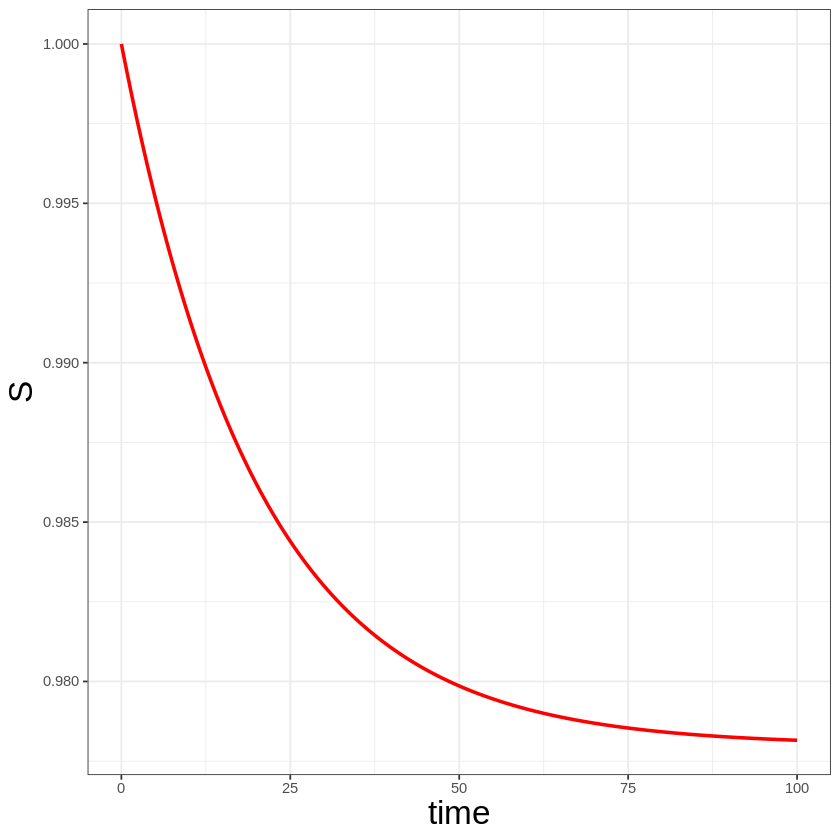

In [7]:
ggplot(out, aes(x = time)) +
geom_line(aes(y = S),color = "red", lwd = 1) + 
xlab("time") +
ylab("S") +
theme_bw() +
theme( 
        axis.title = element_text(size = 20)
)

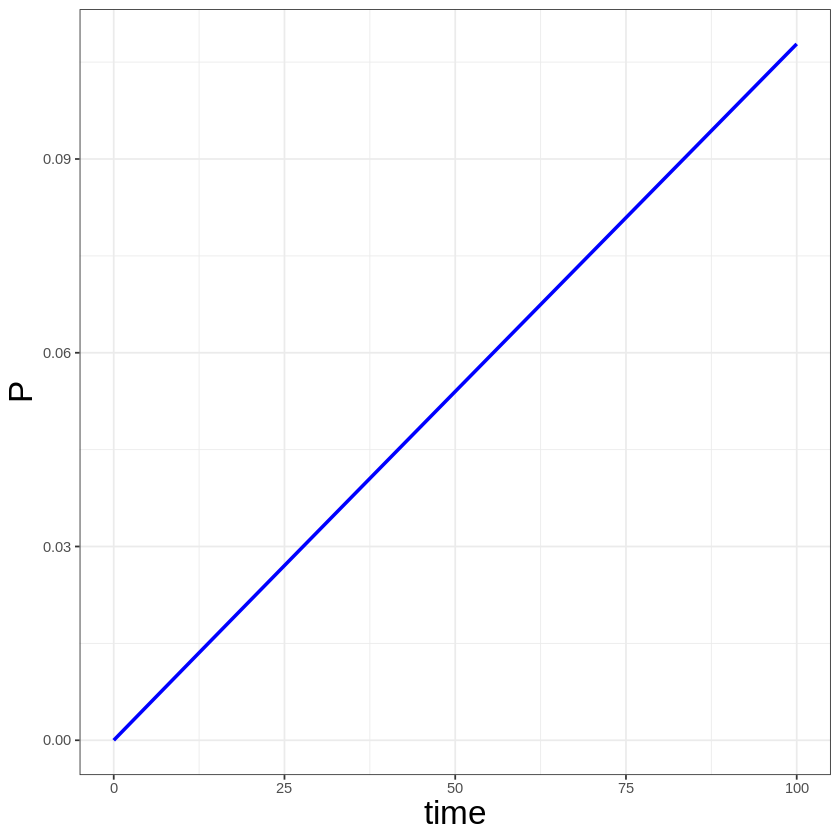

In [8]:
ggplot(out, aes(x = time)) +
geom_line(aes(y = P),color = "blue", lwd = 1) + 
xlab("time") +
ylab("P") +
theme_bw() +
theme( 
        axis.title = element_text(size = 20)
)

# Ecuación de Hill